In [1]:
import gymnasium as gym
import numpy as np
from gymnasium.wrappers import FlattenObservation, TimeLimit
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common import results_plotter
from stable_baselines3.common.results_plotter import load_results, ts2xy
from stable_baselines3 import PPO, A2C, DQN, TD3
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import VecNormalize
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.callbacks import BaseCallback, EvalCallback
from stable_baselines3.common.evaluation import evaluate_policy
from nfv_env import NfvEnv

2024-02-09 12:36:48.916529: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-09 12:36:48.918307: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-09 12:36:48.943880: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-09 12:36:48.943905: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-09 12:36:48.944585: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
log_dir = "logs/"

def make_env(**env_par):
    env = NfvEnv(**env_par)
    # flatten observation space from Dict to vector
    env = FlattenObservation(env)
    # add time limit to create episodes
    env = TimeLimit(env, 1000)
    # add Monitor wrapper (already added by make_vec_env?)
    env = Monitor(env, log_dir)
    return env

# Instantiate the env
max_traffic = 8000

vec_env = make_vec_env(make_env, n_envs=1, env_kwargs={'max_traffic':max_traffic, 'traffic_gen':'sin'})
#normalize observations and reward with moving average
vec_env = VecNormalize(vec_env)

#env = make_vec_env(make_env, n_envs=1, env_kwargs={'max_traffic':max_traffic, 'traffic_gen':'sin'})
#env = make_env()
#env = VecNormalize(env)

created NFV scaling environment
with max traffic:  8000
with max instances:  100


In [3]:
eval_env = make_vec_env(make_env, n_envs=1)
eval_env = VecNormalize(eval_env)
eval_callback = EvalCallback(eval_env, log_path= log_dir, eval_freq=500, deterministic=True, render=False)

created NFV scaling environment
with max traffic:  8000
with max instances:  100


In [4]:
# Train the agent
total_timesteps = 500_000

model = PPO('MlpPolicy', vec_env, gamma=0.99, verbose=0, tensorboard_log="./nfv_scaling_tensorboard/")
model.learn(total_timesteps, progress_bar=True, callback=eval_callback);

Output()

Eval num_timesteps=500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=1000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=1500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=2000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=2500, episode_reward=-4972.08 +/- 78.93

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=3000, episode_reward=-4940.54 +/- 88.85

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=3500, episode_reward=-5151.29 +/- 113.16

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=4000, episode_reward=-5191.57 +/- 101.22

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=4500, episode_reward=-5483.57 +/- 17.42

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=5000, episode_reward=-5486.44 +/- 15.26

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=5500, episode_reward=-5493.04 +/- 12.18

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=6000, episode_reward=-5494.30 +/- 8.92

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=6500, episode_reward=-5754.02 +/- 12.87

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=7000, episode_reward=-5753.04 +/- 12.37

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=7500, episode_reward=-5745.99 +/- 6.87

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=8000, episode_reward=-5749.49 +/- 8.90

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=8500, episode_reward=-4808.79 +/- 0.40

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=9000, episode_reward=-4810.00 +/- 0.61

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=9500, episode_reward=-4810.32 +/- 0.44

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=10000, episode_reward=-4810.31 +/- 0.45

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=10500, episode_reward=-4520.89 +/- 0.00

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=11000, episode_reward=-4520.89 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=11500, episode_reward=-4520.89 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=12000, episode_reward=-4317.72 +/- 0.02

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=12500, episode_reward=-3891.16 +/- 72.62

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=13000, episode_reward=-3746.40 +/- 72.11

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=13500, episode_reward=-3659.21 +/- 0.09

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=14000, episode_reward=-3176.24 +/- 0.00

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=14500, episode_reward=-12293.72 +/- 272.82

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=15000, episode_reward=-12486.75 +/- 234.39

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=15500, episode_reward=-12459.88 +/- 280.22

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=16000, episode_reward=-12676.59 +/- 233.67

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=16500, episode_reward=-14781.40 +/- 240.48

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=17000, episode_reward=-14904.26 +/- 179.29

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=17500, episode_reward=-14860.28 +/- 197.65

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=18000, episode_reward=-14957.87 +/- 160.65

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=18500, episode_reward=-13015.85 +/- 304.99

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=19000, episode_reward=-13146.68 +/- 286.59

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=19500, episode_reward=-13126.87 +/- 281.31

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=20000, episode_reward=-13285.35 +/- 251.30

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=20500, episode_reward=-10119.22 +/- 400.06

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=21000, episode_reward=-10338.39 +/- 347.15

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=21500, episode_reward=-10270.46 +/- 361.02

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=22000, episode_reward=-10460.93 +/- 318.13

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=22500, episode_reward=-10424.79 +/- 314.44

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=23000, episode_reward=-4026.79 +/- 86.64

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=23500, episode_reward=-4027.03 +/- 86.56

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=24000, episode_reward=-4113.85 +/- 89.63

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=24500, episode_reward=-4108.13 +/- 83.78

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=25000, episode_reward=-7245.42 +/- 1132.13

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=25500, episode_reward=-7026.24 +/- 1133.97

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=26000, episode_reward=-7551.72 +/- 1032.07

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=26500, episode_reward=-7390.29 +/- 1061.19

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=27000, episode_reward=-3918.72 +/- 30.75

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=27500, episode_reward=-3918.91 +/- 30.70

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=28000, episode_reward=-3995.74 +/- 36.61

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=28500, episode_reward=-3980.71 +/- 26.30

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=29000, episode_reward=-3631.51 +/- 17.84

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=29500, episode_reward=-3646.84 +/- 20.59

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=30000, episode_reward=-3697.32 +/- 21.18

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=30500, episode_reward=-3704.87 +/- 24.05

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=31000, episode_reward=-3643.74 +/- 19.78

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=31500, episode_reward=-3653.28 +/- 24.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=32000, episode_reward=-3693.64 +/- 20.45

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=32500, episode_reward=-3698.33 +/- 20.50

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=33000, episode_reward=-3185.40 +/- 0.11

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=33500, episode_reward=-3185.39 +/- 0.12

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=34000, episode_reward=-3187.58 +/- 2.18

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=34500, episode_reward=-3224.47 +/- 17.19

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=35000, episode_reward=-3040.10 +/- 0.01

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=35500, episode_reward=-3039.95 +/- 0.01

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=36000, episode_reward=-3040.10 +/- 0.01

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=36500, episode_reward=-3040.10 +/- 0.01

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=37000, episode_reward=-3471.04 +/- 17.25

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=37500, episode_reward=-3461.64 +/- 23.28

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=38000, episode_reward=-3471.06 +/- 17.25

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=38500, episode_reward=-3461.63 +/- 23.29

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=39000, episode_reward=-3396.18 +/- 9.60

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=39500, episode_reward=-3380.73 +/- 16.96

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=40000, episode_reward=-3388.19 +/- 15.56

Eval num_timesteps=40500, episode_reward=-3384.07 +/- 12.86

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=41000, episode_reward=-3079.50 +/- 7.27

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=41500, episode_reward=-3071.95 +/- 5.24

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=42000, episode_reward=-3071.94 +/- 5.17

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=42500, episode_reward=-3079.66 +/- 8.82

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=43000, episode_reward=-3079.95 +/- 8.74

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=43500, episode_reward=-2171.03 +/- 6.59

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=44000, episode_reward=-2175.84 +/- 8.35

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=44500, episode_reward=-2168.00 +/- 1.33

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=45000, episode_reward=-2168.37 +/- 1.20

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=45500, episode_reward=-2199.44 +/- 18.40

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=46000, episode_reward=-2203.24 +/- 20.50

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=46500, episode_reward=-2206.38 +/- 23.76

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=47000, episode_reward=-2198.60 +/- 22.94

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=47500, episode_reward=-2151.31 +/- 24.38

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=48000, episode_reward=-2160.06 +/- 22.67

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=48500, episode_reward=-2164.21 +/- 40.40

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=49000, episode_reward=-2176.53 +/- 33.92

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=49500, episode_reward=-1990.77 +/- 34.88

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=50000, episode_reward=-2003.79 +/- 26.85

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=50500, episode_reward=-2010.12 +/- 29.27

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=51000, episode_reward=-2014.84 +/- 21.46

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=51500, episode_reward=-1848.78 +/- 35.71

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=52000, episode_reward=-1869.99 +/- 36.61

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=52500, episode_reward=-1869.77 +/- 27.53

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=53000, episode_reward=-1861.84 +/- 31.85

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=53500, episode_reward=-1706.51 +/- 30.33

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=54000, episode_reward=-1719.95 +/- 34.03

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=54500, episode_reward=-1726.79 +/- 29.16

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=55000, episode_reward=-1739.25 +/- 20.48

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=55500, episode_reward=-1940.16 +/- 32.21

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=56000, episode_reward=-1963.96 +/- 55.48

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=56500, episode_reward=-1963.34 +/- 46.01

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=57000, episode_reward=-1984.46 +/- 39.86

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=57500, episode_reward=-2005.54 +/- 43.71

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=58000, episode_reward=-2010.63 +/- 44.73

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=58500, episode_reward=-2028.16 +/- 31.95

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=59000, episode_reward=-2032.74 +/- 34.56

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=59500, episode_reward=-1952.10 +/- 32.16

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=60000, episode_reward=-1964.11 +/- 30.71

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=60500, episode_reward=-1971.40 +/- 40.27

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=61000, episode_reward=-1970.89 +/- 25.64

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=61500, episode_reward=-1777.40 +/- 38.63

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=62000, episode_reward=-1783.77 +/- 40.50

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=62500, episode_reward=-1802.81 +/- 36.37

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=63000, episode_reward=-1824.70 +/- 43.39

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=63500, episode_reward=-1674.97 +/- 48.10

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=64000, episode_reward=-1694.85 +/- 47.21

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=64500, episode_reward=-1715.40 +/- 46.04

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=65000, episode_reward=-1724.95 +/- 35.24

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=65500, episode_reward=-1733.48 +/- 33.05

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=66000, episode_reward=-1562.89 +/- 38.96

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=66500, episode_reward=-1579.93 +/- 36.89

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=67000, episode_reward=-1590.17 +/- 46.89

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=67500, episode_reward=-1598.53 +/- 44.95

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=68000, episode_reward=-1298.88 +/- 56.78

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=68500, episode_reward=-1322.78 +/- 42.70

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=69000, episode_reward=-1340.26 +/- 46.33

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=69500, episode_reward=-1360.56 +/- 47.76

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=70000, episode_reward=-1353.31 +/- 61.76

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=70500, episode_reward=-1374.30 +/- 49.41

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=71000, episode_reward=-1398.17 +/- 56.22

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=71500, episode_reward=-1417.39 +/- 59.91

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=72000, episode_reward=-1102.22 +/- 56.73

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=72500, episode_reward=-1130.33 +/- 72.35

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=73000, episode_reward=-1147.49 +/- 72.64

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=73500, episode_reward=-1184.85 +/- 76.06

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=74000, episode_reward=-1183.89 +/- 68.31

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=74500, episode_reward=-1199.47 +/- 66.57

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=75000, episode_reward=-1231.85 +/- 70.80

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=75500, episode_reward=-1258.22 +/- 82.05

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=76000, episode_reward=-1081.10 +/- 67.92

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=76500, episode_reward=-1098.05 +/- 67.59

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=77000, episode_reward=-1133.30 +/- 64.35

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=77500, episode_reward=-1150.06 +/- 69.25

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=78000, episode_reward=-918.26 +/- 22.04

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=78500, episode_reward=-926.51 +/- 22.22

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=79000, episode_reward=-936.64 +/- 32.53

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=79500, episode_reward=-943.61 +/- 34.70

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=80000, episode_reward=-943.17 +/- 47.52

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=80500, episode_reward=-962.91 +/- 69.17

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=81000, episode_reward=-979.39 +/- 72.89

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=81500, episode_reward=-1010.10 +/- 82.70

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=82000, episode_reward=-958.61 +/- 59.35

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=82500, episode_reward=-982.12 +/- 73.83

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=83000, episode_reward=-1007.17 +/- 74.95

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=83500, episode_reward=-1037.15 +/- 83.38

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=84000, episode_reward=-1048.60 +/- 115.98

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=84500, episode_reward=-1098.32 +/- 114.17

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=85000, episode_reward=-1138.95 +/- 127.03

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=85500, episode_reward=-1186.73 +/- 118.22

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=86000, episode_reward=-1227.06 +/- 132.11

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=86500, episode_reward=-1029.09 +/- 142.89

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=87000, episode_reward=-1088.39 +/- 167.11

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=87500, episode_reward=-1140.80 +/- 175.79

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=88000, episode_reward=-1217.19 +/- 200.55

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=88500, episode_reward=-940.72 +/- 82.34

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=89000, episode_reward=-964.73 +/- 91.80

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=89500, episode_reward=-1001.27 +/- 98.63

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=90000, episode_reward=-1032.42 +/- 107.91

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=90500, episode_reward=-892.52 +/- 48.04

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=91000, episode_reward=-925.68 +/- 86.84

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=91500, episode_reward=-945.40 +/- 100.34

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=92000, episode_reward=-1000.67 +/- 136.15

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=92500, episode_reward=-883.12 +/- 44.27

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=93000, episode_reward=-895.23 +/- 55.16

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=93500, episode_reward=-913.53 +/- 66.76

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=94000, episode_reward=-929.51 +/- 74.10

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=94500, episode_reward=-1007.27 +/- 81.07

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=95000, episode_reward=-1030.98 +/- 80.22

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=95500, episode_reward=-1065.98 +/- 81.26

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=96000, episode_reward=-1094.72 +/- 84.43

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=96500, episode_reward=-949.27 +/- 67.16

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=97000, episode_reward=-969.43 +/- 75.91

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=97500, episode_reward=-999.54 +/- 68.10

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=98000, episode_reward=-1026.00 +/- 79.30

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=98500, episode_reward=-931.05 +/- 61.75

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=99000, episode_reward=-945.90 +/- 65.45

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=99500, episode_reward=-977.97 +/- 69.28

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=100000, episode_reward=-1003.33 +/- 80.19

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=100500, episode_reward=-1072.49 +/- 81.37

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=101000, episode_reward=-1096.70 +/- 86.07

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=101500, episode_reward=-1137.51 +/- 90.80

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=102000, episode_reward=-1158.44 +/- 97.86

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=102500, episode_reward=-1027.00 +/- 91.65

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=103000, episode_reward=-1057.18 +/- 103.81

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=103500, episode_reward=-1093.96 +/- 108.39

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=104000, episode_reward=-1127.80 +/- 101.22

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=104500, episode_reward=-1067.45 +/- 77.89

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=105000, episode_reward=-1085.73 +/- 74.61

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=105500, episode_reward=-1117.68 +/- 69.90

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=106000, episode_reward=-1142.49 +/- 71.23

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=106500, episode_reward=-969.40 +/- 67.01

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=107000, episode_reward=-994.89 +/- 71.09

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=107500, episode_reward=-1016.12 +/- 71.39

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=108000, episode_reward=-1043.49 +/- 71.77

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=108500, episode_reward=-1068.89 +/- 70.69

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=109000, episode_reward=-1005.14 +/- 70.92

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=109500, episode_reward=-1027.26 +/- 79.32

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=110000, episode_reward=-1056.76 +/- 84.66

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=110500, episode_reward=-1083.83 +/- 96.94

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=111000, episode_reward=-1166.27 +/- 80.89

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=111500, episode_reward=-1199.02 +/- 85.44

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=112000, episode_reward=-1225.64 +/- 94.21

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=112500, episode_reward=-1260.74 +/- 91.28

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=113000, episode_reward=-1188.80 +/- 93.77

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=113500, episode_reward=-1219.12 +/- 98.36

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=114000, episode_reward=-1250.17 +/- 90.94

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=114500, episode_reward=-1281.89 +/- 90.72

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=115000, episode_reward=-1168.44 +/- 78.66

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=115500, episode_reward=-1201.03 +/- 76.93

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=116000, episode_reward=-1228.38 +/- 77.04

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=116500, episode_reward=-1275.69 +/- 102.01

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=117000, episode_reward=-1141.41 +/- 111.10

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=117500, episode_reward=-1177.82 +/- 119.27

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=118000, episode_reward=-1216.22 +/- 121.77

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=118500, episode_reward=-1262.63 +/- 132.74

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=119000, episode_reward=-1158.64 +/- 138.08

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=119500, episode_reward=-1207.64 +/- 160.44

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=120000, episode_reward=-1262.97 +/- 175.85

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=120500, episode_reward=-1324.90 +/- 201.42

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=121000, episode_reward=-1218.40 +/- 164.02

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=121500, episode_reward=-1278.80 +/- 197.10

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=122000, episode_reward=-1350.44 +/- 228.99

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=122500, episode_reward=-1432.55 +/- 253.08

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=123000, episode_reward=-1328.31 +/- 156.87

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=123500, episode_reward=-1389.43 +/- 162.41

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=124000, episode_reward=-1449.64 +/- 182.78

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=124500, episode_reward=-1517.84 +/- 199.54

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=125000, episode_reward=-1464.23 +/- 213.59

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=125500, episode_reward=-1536.63 +/- 226.24

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=126000, episode_reward=-1621.67 +/- 246.79

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=126500, episode_reward=-1705.77 +/- 263.30

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=127000, episode_reward=-1658.70 +/- 280.51

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=127500, episode_reward=-1757.35 +/- 299.40

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=128000, episode_reward=-1851.92 +/- 314.64

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=128500, episode_reward=-1955.39 +/- 313.09

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=129000, episode_reward=-2068.70 +/- 332.54

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=129500, episode_reward=-1753.31 +/- 296.43

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=130000, episode_reward=-1845.40 +/- 298.14

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=130500, episode_reward=-1950.56 +/- 311.08

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=131000, episode_reward=-2058.09 +/- 309.39

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=131500, episode_reward=-1815.05 +/- 243.36

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=132000, episode_reward=-1894.49 +/- 253.01

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=132500, episode_reward=-1984.94 +/- 265.04

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=133000, episode_reward=-2077.62 +/- 272.25

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=133500, episode_reward=-1870.71 +/- 338.15

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=134000, episode_reward=-1985.15 +/- 350.69

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=134500, episode_reward=-2109.19 +/- 361.82

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=135000, episode_reward=-2221.38 +/- 350.11

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=135500, episode_reward=-1949.88 +/- 429.34

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=136000, episode_reward=-2099.52 +/- 443.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=136500, episode_reward=-2242.86 +/- 430.77

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=137000, episode_reward=-2398.33 +/- 419.15

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=137500, episode_reward=-2382.10 +/- 533.19

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=138000, episode_reward=-2582.67 +/- 497.14

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=138500, episode_reward=-2749.62 +/- 461.63

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=139000, episode_reward=-2933.49 +/- 422.89

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=139500, episode_reward=-2628.10 +/- 607.10

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=140000, episode_reward=-2862.46 +/- 517.61

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=140500, episode_reward=-3050.26 +/- 450.34

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=141000, episode_reward=-3223.75 +/- 429.38

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=141500, episode_reward=-2935.30 +/- 704.91

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=142000, episode_reward=-3258.36 +/- 454.72

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=142500, episode_reward=-3398.18 +/- 425.15

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=143000, episode_reward=-3554.52 +/- 409.56

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=143500, episode_reward=-2742.12 +/- 738.55

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=144000, episode_reward=-2985.70 +/- 588.40

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=144500, episode_reward=-3231.51 +/- 419.64

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=145000, episode_reward=-3385.49 +/- 384.04

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=145500, episode_reward=-3350.43 +/- 598.60

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=146000, episode_reward=-3613.65 +/- 400.33

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=146500, episode_reward=-3772.47 +/- 386.38

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=147000, episode_reward=-3898.98 +/- 383.06

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=147500, episode_reward=-3866.04 +/- 339.56

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=148000, episode_reward=-3968.85 +/- 314.81

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=148500, episode_reward=-4099.24 +/- 331.11

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=149000, episode_reward=-4190.58 +/- 320.21

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=149500, episode_reward=-4328.15 +/- 317.63

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=150000, episode_reward=-4487.96 +/- 322.89

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=150500, episode_reward=-4610.65 +/- 330.85

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=151000, episode_reward=-4727.86 +/- 344.53

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=151500, episode_reward=-4858.22 +/- 346.80

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=152000, episode_reward=-5366.21 +/- 366.81

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=152500, episode_reward=-5513.15 +/- 389.99

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=153000, episode_reward=-5649.97 +/- 409.08

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=153500, episode_reward=-5779.98 +/- 375.82

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=154000, episode_reward=-6538.98 +/- 424.03

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=154500, episode_reward=-6693.90 +/- 449.19

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=155000, episode_reward=-6836.18 +/- 415.70

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=155500, episode_reward=-6949.03 +/- 428.23

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=156000, episode_reward=-6562.12 +/- 328.90

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=156500, episode_reward=-6687.53 +/- 374.11

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=157000, episode_reward=-6808.44 +/- 390.92

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=157500, episode_reward=-6931.76 +/- 368.22

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=158000, episode_reward=-6882.07 +/- 335.89

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=158500, episode_reward=-7002.55 +/- 310.91

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=159000, episode_reward=-7075.73 +/- 306.04

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=159500, episode_reward=-7174.27 +/- 319.09

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=160000, episode_reward=-7469.71 +/- 357.71

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=160500, episode_reward=-7591.63 +/- 318.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=161000, episode_reward=-7692.24 +/- 355.66

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=161500, episode_reward=-7759.55 +/- 345.60

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=162000, episode_reward=-7745.87 +/- 353.45

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=162500, episode_reward=-7842.85 +/- 343.96

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=163000, episode_reward=-7912.76 +/- 302.51

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=163500, episode_reward=-8007.88 +/- 248.27

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=164000, episode_reward=-8423.45 +/- 397.87

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=164500, episode_reward=-8509.90 +/- 449.66

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=165000, episode_reward=-8614.64 +/- 440.28

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=165500, episode_reward=-8711.04 +/- 451.04

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=166000, episode_reward=-8584.51 +/- 449.56

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=166500, episode_reward=-8681.44 +/- 442.28

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=167000, episode_reward=-8786.22 +/- 417.04

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=167500, episode_reward=-8872.12 +/- 369.91

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=168000, episode_reward=-8787.84 +/- 415.61

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=168500, episode_reward=-8893.40 +/- 370.14

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=169000, episode_reward=-8980.71 +/- 279.02

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=169500, episode_reward=-9085.18 +/- 70.08

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=170000, episode_reward=-8917.65 +/- 376.32

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=170500, episode_reward=-9031.89 +/- 176.67

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=171000, episode_reward=-9112.59 +/- 15.27

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=171500, episode_reward=-9120.22 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=172000, episode_reward=-11025.18 +/- 3809.92

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=172500, episode_reward=-9742.19 +/- 1243.94

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=173000, episode_reward=-11727.09 +/- 5213.74

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=173500, episode_reward=-13793.15 +/- 8134.64

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=174000, episode_reward=-15810.38 +/- 8593.73

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=174500, episode_reward=-17026.58 +/- 9706.30

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=175000, episode_reward=-19086.61 +/- 9354.57

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=175500, episode_reward=-21126.61 +/- 9843.44

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=176000, episode_reward=-23192.63 +/- 8635.95

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=176500, episode_reward=-19571.98 +/- 9312.51

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=177000, episode_reward=-21613.79 +/- 10200.95

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=177500, episode_reward=-23696.24 +/- 8328.95

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=178000, episode_reward=-25780.31 +/- 8330.05

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=178500, episode_reward=-16575.57 +/- 9234.80

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=179000, episode_reward=-18611.05 +/- 9492.38

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=179500, episode_reward=-20699.73 +/- 9600.78

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=180000, episode_reward=-22751.36 +/- 8989.50

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=180500, episode_reward=-15608.68 +/- 8462.83

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=181000, episode_reward=-17668.97 +/- 10029.59

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=181500, episode_reward=-19724.90 +/- 9320.18

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=182000, episode_reward=-21784.53 +/- 9995.48

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=182500, episode_reward=-17196.69 +/- 9899.67

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=183000, episode_reward=-19289.35 +/- 9324.74

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=183500, episode_reward=-21344.91 +/- 9993.48

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=184000, episode_reward=-23462.00 +/- 8458.22

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=184500, episode_reward=-17404.80 +/- 10146.74

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=185000, episode_reward=-19491.44 +/- 9312.50

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=185500, episode_reward=-21549.62 +/- 10149.24

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=186000, episode_reward=-23647.91 +/- 8353.64

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=186500, episode_reward=-17075.02 +/- 9760.55

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=187000, episode_reward=-19182.63 +/- 9338.26

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=187500, episode_reward=-21223.39 +/- 9907.86

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=188000, episode_reward=-23338.80 +/- 8535.75

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=188500, episode_reward=-17131.66 +/- 9824.81

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=189000, episode_reward=-19248.58 +/- 9329.33

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=189500, episode_reward=-21288.08 +/- 9952.79

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=190000, episode_reward=-23413.10 +/- 8488.22

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=190500, episode_reward=-15859.05 +/- 8627.84

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=191000, episode_reward=-17957.67 +/- 9829.77

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=191500, episode_reward=-20007.33 +/- 9360.65

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=192000, episode_reward=-22114.03 +/- 9620.85

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=192500, episode_reward=-24179.97 +/- 8141.20

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=193000, episode_reward=-24058.61 +/- 8177.96

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=193500, episode_reward=-26170.80 +/- 7544.07

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=194000, episode_reward=-28239.27 +/- 3407.12

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=194500, episode_reward=-29942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=195000, episode_reward=-25624.79 +/- 8257.64

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=195500, episode_reward=-27764.05 +/- 4357.56

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=196000, episode_reward=-29832.19 +/- 221.28

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=196500, episode_reward=-29942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=197000, episode_reward=-27739.84 +/- 4405.98

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=197500, episode_reward=-29806.25 +/- 273.16

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=198000, episode_reward=-29942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=198500, episode_reward=-29942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=199000, episode_reward=-29028.77 +/- 1828.12

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=199500, episode_reward=-29942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=200000, episode_reward=-29942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=200500, episode_reward=-29942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=201000, episode_reward=-17653.39 +/- 9488.88

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=201500, episode_reward=-19626.83 +/- 8966.57

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=202000, episode_reward=-21558.83 +/- 9510.30

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=202500, episode_reward=-23486.83 +/- 8275.25

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=203000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=203500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=204000, episode_reward=-11746.83 +/- 3608.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=204500, episode_reward=-13686.83 +/- 7488.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=205000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=205500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=206000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=206500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=207000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=207500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=208000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=208500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=209000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=209500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=210000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=210500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=211000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=211500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=212000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=212500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=213000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=213500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=214000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=214500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=215000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=215500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=216000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=216500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=217000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=217500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=218000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=218500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=219000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=219500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=220000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=220500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=221000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=221500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=222000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=222500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=223000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=223500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=224000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=224500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=225000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=225500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=226000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=226500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=227000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=227500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=228000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=228500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=229000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=229500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=230000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=230500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=231000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=231500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=232000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=232500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=233000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=233500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=234000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=234500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=235000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=235500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=236000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=236500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=237000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=237500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=238000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=238500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=239000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=239500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=240000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=240500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=241000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=241500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=242000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=242500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=243000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=243500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=244000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=244500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=245000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=245500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=246000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=246500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=247000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=247500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=248000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=248500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=249000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=249500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=250000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=250500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=251000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=251500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=252000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=252500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=253000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=253500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=254000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=254500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=255000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=255500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=256000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=256500, episode_reward=-8218.71 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=257000, episode_reward=-8218.71 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=257500, episode_reward=-8218.71 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=258000, episode_reward=-8218.71 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=258500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=259000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=259500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=260000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=260500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=261000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=261500, episode_reward=-9942.83 +/- 0.00

Eval num_timesteps=262000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=262500, episode_reward=-8218.71 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=263000, episode_reward=-8218.71 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=263500, episode_reward=-8218.71 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=264000, episode_reward=-8563.54 +/- 689.65

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=264500, episode_reward=-9598.01 +/- 689.65

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=265000, episode_reward=-9598.01 +/- 689.65

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=265500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=266000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=266500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=267000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=267500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=268000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=268500, episode_reward=-8563.54 +/- 689.65

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=269000, episode_reward=-8563.54 +/- 689.65

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=269500, episode_reward=-8908.36 +/- 844.64

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=270000, episode_reward=-8908.36 +/- 844.64

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=270500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=271000, episode_reward=-9942.83 +/- 0.00

Eval num_timesteps=271500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=272000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=272500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=273000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=273500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=274000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=274500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=275000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=275500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=276000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=276500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=277000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=277500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=278000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=278500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=279000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=279500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=280000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=280500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=281000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=281500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=282000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=282500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=283000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=283500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=284000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=284500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=285000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=285500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=286000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=286500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=287000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=287500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=288000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=288500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=289000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=289500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=290000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=290500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=291000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=291500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=292000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=292500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=293000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=293500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=294000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=294500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=295000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=295500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=296000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=296500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=297000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=297500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=298000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=298500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=299000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=299500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=300000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=300500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=301000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=301500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=302000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=302500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=303000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=303500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=304000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=304500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=305000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=305500, episode_reward=-8218.71 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=306000, episode_reward=-8218.71 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=306500, episode_reward=-8218.71 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=307000, episode_reward=-8218.71 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=307500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=308000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=308500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=309000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=309500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=310000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=310500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=311000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=311500, episode_reward=-8908.36 +/- 844.64

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=312000, episode_reward=-8908.36 +/- 844.64

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=312500, episode_reward=-8908.36 +/- 844.64

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=313000, episode_reward=-8908.36 +/- 844.64

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=313500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=314000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=314500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=315000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=315500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=316000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=316500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=317000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=317500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=318000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=318500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=319000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=319500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=320000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=320500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=321000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=321500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=322000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=322500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=323000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=323500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=324000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=324500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=325000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=325500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=326000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=326500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=327000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=327500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=328000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=328500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=329000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=329500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=330000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=330500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=331000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=331500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=332000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=333000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=333500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=334000, episode_reward=-9942.83 +/- 0.00

Eval num_timesteps=334500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=335000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=335500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=336000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=336500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=337000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=337500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=338000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=338500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=339000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=339500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=340000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=340500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=341000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=341500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=342000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=342500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=343000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=343500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=344000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=344500, episode_reward=-8563.54 +/- 689.65

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=345000, episode_reward=-8563.54 +/- 689.65

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=345500, episode_reward=-8563.54 +/- 689.65

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=346000, episode_reward=-8563.54 +/- 689.65

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=346500, episode_reward=-8056.77 +/- 323.89

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=347000, episode_reward=-8056.77 +/- 323.89

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=347500, episode_reward=-8056.77 +/- 323.89

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=348000, episode_reward=-8056.77 +/- 323.89

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=348500, episode_reward=-7171.04 +/- 291.43

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=349000, episode_reward=-7171.04 +/- 291.43

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=349500, episode_reward=-7171.04 +/- 291.43

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=350000, episode_reward=-7171.04 +/- 291.43

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=350500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=351000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=351500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=352000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=352500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=353000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=353500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=354000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=354500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=355000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=355500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=356000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=356500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=357000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=357500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=358000, episode_reward=-9942.83 +/- 0.00

Eval num_timesteps=358500, episode_reward=-5786.24 +/- 172.42

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=359000, episode_reward=-5786.15 +/- 172.53

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=359500, episode_reward=-5786.15 +/- 172.53

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=360000, episode_reward=-5715.71 +/- 172.44

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=360500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=361000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=361500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=362000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=362500, episode_reward=-4738.55 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=363000, episode_reward=-4738.55 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=363500, episode_reward=-4738.55 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=364000, episode_reward=-4738.55 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=364500, episode_reward=-4738.55 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=365000, episode_reward=-4987.80 +/- 0.06

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=365500, episode_reward=-4987.80 +/- 0.06

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=366000, episode_reward=-4987.71 +/- 0.17

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=366500, episode_reward=-4987.71 +/- 0.17

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=367000, episode_reward=-4738.55 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=367500, episode_reward=-4738.55 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=368000, episode_reward=-4738.55 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=368500, episode_reward=-4738.55 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=369000, episode_reward=-4513.51 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=369500, episode_reward=-4513.51 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=370500, episode_reward=-4513.51 +/- 0.01

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=371000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=371500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=372000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=372500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=373000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=373500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=374000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=374500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=375000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=375500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=376000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=376500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=377000, episode_reward=-4123.50 +/- 0.11

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=377500, episode_reward=-4123.50 +/- 0.11

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=378000, episode_reward=-4123.50 +/- 0.11

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=378500, episode_reward=-4123.50 +/- 0.11

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=379000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=379500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=380000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=380500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=381000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=381500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=382000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=382500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=383000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=383500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=384000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=384500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=385000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=385500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=386000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=386500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=387000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=387500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=388000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=388500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=389000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=389500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=390000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=390500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=391000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=391500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=392000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=392500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=393000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=393500, episode_reward=-4123.62 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=394000, episode_reward=-4123.62 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=394500, episode_reward=-4123.62 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=395000, episode_reward=-4123.62 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=395500, episode_reward=-4123.71 +/- 0.11

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=396000, episode_reward=-4123.71 +/- 0.11

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=396500, episode_reward=-4123.76 +/- 0.11

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=397000, episode_reward=-4123.76 +/- 0.11

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=397500, episode_reward=-4309.55 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=398000, episode_reward=-4309.55 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=398500, episode_reward=-4309.55 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=399000, episode_reward=-4309.55 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=399500, episode_reward=-4309.40 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=400000, episode_reward=-4309.40 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=400500, episode_reward=-4309.40 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=401000, episode_reward=-4309.40 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=401500, episode_reward=-4309.46 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=402000, episode_reward=-4309.46 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=402500, episode_reward=-4309.46 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=403000, episode_reward=-4309.46 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=403500, episode_reward=-4309.40 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=404000, episode_reward=-4309.40 +/- 0.01

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=404500, episode_reward=-4309.40 +/- 0.01

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=405000, episode_reward=-4309.41 +/- 0.01

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=405500, episode_reward=-4309.40 +/- 0.01

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=406000, episode_reward=-4123.73 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=406500, episode_reward=-4123.73 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=407000, episode_reward=-4123.73 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=407500, episode_reward=-4123.73 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=408000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=408500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=409000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=409500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=410000, episode_reward=-4309.48 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=410500, episode_reward=-4309.48 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=411000, episode_reward=-4309.48 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=411500, episode_reward=-4309.48 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=412000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=412500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=413000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=413500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=414000, episode_reward=-4309.69 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=414500, episode_reward=-4309.69 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=415000, episode_reward=-4309.69 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=415500, episode_reward=-4309.69 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=416000, episode_reward=-4309.52 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=416500, episode_reward=-4309.52 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=417000, episode_reward=-4309.52 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=417500, episode_reward=-4309.52 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=418000, episode_reward=-4309.72 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=418500, episode_reward=-4309.72 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=419000, episode_reward=-4309.72 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=419500, episode_reward=-4309.72 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=420000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=420500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=421000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=421500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=422000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=422500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=423000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=423500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=424000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=424500, episode_reward=-9942.83 +/- 0.00

Eval num_timesteps=425000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=425500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=426000, episode_reward=-4309.52 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=426500, episode_reward=-4309.52 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=427000, episode_reward=-4309.52 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=427500, episode_reward=-4309.52 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=428000, episode_reward=-4309.52 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=428500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=429000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=429500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=430000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=430500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=431000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=431500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=432000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=432500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=433000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=433500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=434000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=434500, episode_reward=-4123.91 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=435000, episode_reward=-4123.91 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=435500, episode_reward=-4123.91 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=436000, episode_reward=-4123.91 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=436500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=437000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=437500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=438000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=438500, episode_reward=-4123.78 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=439000, episode_reward=-4123.78 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=439500, episode_reward=-4123.78 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=440000, episode_reward=-4123.78 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=440500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=441000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=441500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=442000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=442500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=443000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=443500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=444000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=444500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=445000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=445500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=446000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=446500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=447000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=447500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=448000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=448500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=449000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=449500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=450000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=450500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=451000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=451500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=452000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=452500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=453000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=453500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=454000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=454500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=455000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=455500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=456000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=456500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=457000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=457500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=458000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=458500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=459000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=459500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=460000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=460500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=461000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=461500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=462000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=462500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=463000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=463500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=464000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=464500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=465000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=465500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=466000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=466500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=467000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=467500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=468000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=468500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=469000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=469500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=470000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=470500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=471000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=471500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=472000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=472500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=473000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=473500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=474000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=474500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=475000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=475500, episode_reward=-4310.07 +/- 0.01

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=476000, episode_reward=-4310.07 +/- 0.01

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=476500, episode_reward=-4310.07 +/- 0.02

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=477000, episode_reward=-4310.07 +/- 0.01

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=477500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=478000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=478500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=479000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=479500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=480000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=480500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=481000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=481500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=482000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=482500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=483000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=483500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=484000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=484500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=485000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=485500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=486000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=486500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=487000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=487500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=488000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=488500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=489000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=489500, episode_reward=-4309.81 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=490000, episode_reward=-4309.81 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=490500, episode_reward=-4309.81 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=491000, episode_reward=-4309.81 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=491500, episode_reward=-4309.81 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=492000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=492500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=493000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=493500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=494000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=494500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=495000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=495500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=496000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=496500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=497000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=497500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=498000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=498500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=499000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=499500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=500000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=500500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=501000, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=501500, episode_reward=-9942.83 +/- 0.00

Episode length: 1000.00 +/- 0.00

In [5]:
# Test the trained agent

test_env = make_vec_env(make_env, n_envs=1, env_kwargs={'max_traffic':max_traffic, 'traffic_gen':'mix'})
obs = test_env.reset()
#print("obs=", obs)
n_steps = 1000

actions = []
traffics = []
powers = []
instances = []
optimal = []
rewards = []

for step in range(n_steps):
    action, _ = model.predict(obs, deterministic=True)
    #print(f"Step {step + 1}")
    #print("Action: ", action)
    actions.append(action)
    obs, reward, terminated, info = test_env.step(action)
    
    instances.append(obs[0][0]) #obs space flattened in alphabetical order
    traffics.append(info[0]['req_traffic'])
    optimal.append(info[0]['optimal_instances'])
    rewards.append(reward[0])

created NFV scaling environment
with max traffic:  8000
with max instances:  100


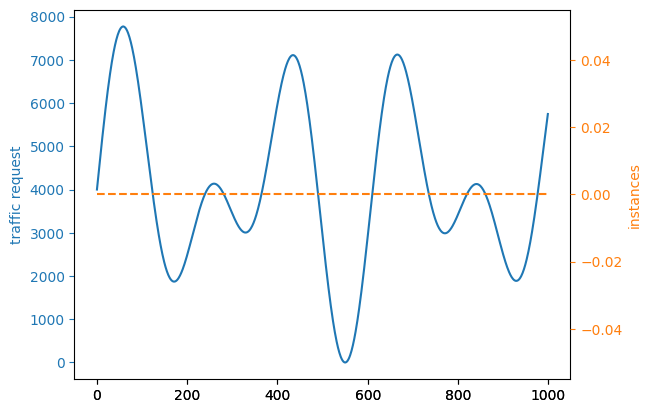

In [6]:
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111, label="traffics")
ax2=fig.add_subplot(111, label="intances", frame_on=False)
#ax3=fig.add_subplot(111, label="optimal", frame_on=False)

ax.plot(traffics, color="C0", alpha=1)
ax.set_ylabel("traffic request", color="C0")
ax.tick_params(axis='y', colors="C0")

ax2.plot(instances, color="C1", linestyle='dashed')
ax2.yaxis.tick_right()
ax2.set_ylabel("instances", color="C1")       
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='y', colors="C1")
ax2.yaxis.get_major_locator().set_params(integer=True)

#ax3.plot(optimal, color="C3", alpha= 1, linestyle='dotted')

plt.show()

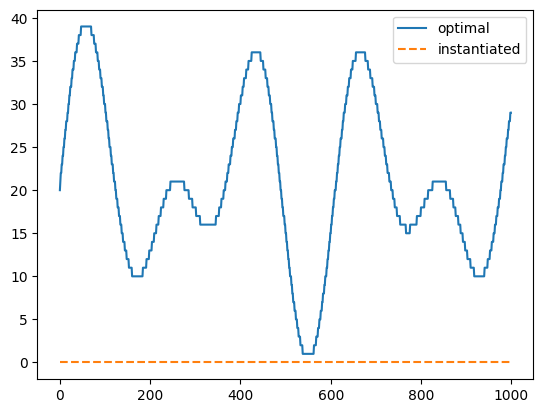

In [7]:
plt.plot(optimal, label ="optimal")
plt.plot(instances, linestyle='dashed', label ="instantiated")
plt.legend()
plt.show()

In [8]:
#model.save('saved models/PPO_sin_500k_rew3_stable')

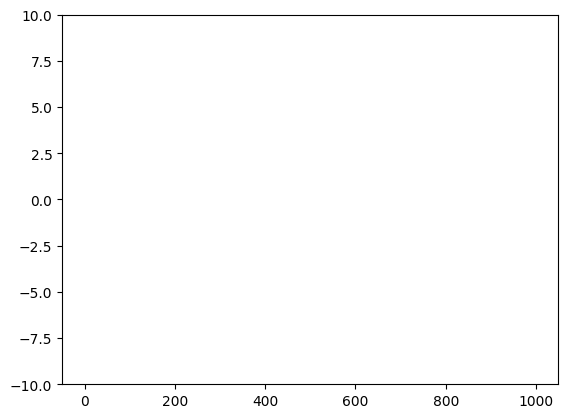

In [9]:
plt.plot(rewards)
plt.ylim(-10,10)
plt.show()
#TODO optimal rewards in info from env